In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import cv2
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    f1_score,
    accuracy_score,
    recall_score
)

In [52]:
!python --version

Python 3.10.12


# Utils

In [53]:
def get_image_at(index):
    image = train_x[index].reshape(32,32)
    return image

def get_image_random():
    index = np.random.randint(0,len(train_x))
    image = train_x[index].reshape(32,32)
    return image, index

In [54]:
def select_image_and_predict(model, image_pos=-1):
    if image_pos == -1:
        test_image, index = get_image_random()
    else:
        test_image = get_image_at(image_pos)
    plt.imshow(test_image)
    print('Number:', train_y[index][0])
    test_image = test_image.reshape(1,-1)
    predicted = model.predict(test_image)
    print('Predicted Number:', predicted[0])

def random_images_predict(model):
  fig, axes = plt.subplots(1, 5, figsize=(10, 5))
  indices = np.random.choice(np.arange(len(test_x)), 5)
  labels = test_y[indices]
  x = test_x[indices]
  y_pred = model.predict(x)
  for ax, index in zip(axes, range(5)):
      ax.imshow(x[index].reshape(32, 32), cmap='gray')
      ax.set_title(f"Actual: {labels[index][0]}\nPred: {y_pred[index]}")
      ax.axis('off')
  plt.show()

def random_images_predict_kmeans():
  fig, axes = plt.subplots(1, 5, figsize=(10, 5))
  indices = np.random.choice(np.arange(len(test_x)), 5)
  labels = test_y[indices]
  x = test_x[indices]
  y_pred = kmeans.predict(x)
  y_pred = np.array([mapping[i] for i in y_pred])
  for ax, index in zip(axes, range(5)):
      ax.imshow(x[index].reshape(32, 32), cmap='gray')
      ax.set_title(f"Actual: {labels[index][0]}\nPred: {y_pred[index]}")
      ax.axis('off')
  plt.show()

def random_images_predict_ann():
  fig, axes = plt.subplots(1, 5, figsize=(10, 5))
  indices = np.random.choice(np.arange(len(test_x)), 5)
  labels = test_y[indices]
  x = test_x[indices]
  y_pred = ann.predict(x)
  y_pred = y_pred.argmax(axis=1)
  for ax, index in zip(axes, range(5)):
      ax.imshow(x[index].reshape(32, 32), cmap='gray')
      ax.set_title(f"Actual: {labels[index][0]}\nPred: {y_pred[index]}")
      ax.axis('off')
  plt.show()


In [155]:
def get_metrics(model, y_test, y_pred,name, _display_labels=None):
  if _display_labels is None:
    _display_labels = model.classes_
  cm = confusion_matrix(y_test, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=_display_labels)
  disp.plot(cmap='Blues')
  plt.title(f"Confusion Matrix ({name})")
  plt.show()

  precision = precision_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, average='weighted')


  print(f"Precision: {precision:.2f}")
  print(f"F1 Score: {f1:.2f}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Recall: {recall:.2f}")

# Image Preprocessing

In [75]:
train_df = pd.read_csv('train_digits_data.csv') #Image size is 32 x 32
test_df = pd.read_csv('test_digits_data.csv')

In [76]:
train_df.columns

Index(['pixel_0000', 'pixel_0001', 'pixel_0002', 'pixel_0003', 'pixel_0004',
       'pixel_0005', 'pixel_0006', 'pixel_0007', 'pixel_0008', 'pixel_0009',
       ...
       'pixel_1015', 'pixel_1016', 'pixel_1017', 'pixel_1018', 'pixel_1019',
       'pixel_1020', 'pixel_1021', 'pixel_1022', 'pixel_1023', 'character'],
      dtype='object', length=1025)

In [77]:
train_df.head(5)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0


In [78]:
#randomize the data
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [79]:
train_x = train_df.iloc[:,:-1].astype('uint8').to_numpy()
train_y = train_df.iloc[:,-1].str.extract('(\d+)').astype(int).to_numpy()
test_x = test_df.iloc[:,:-1].astype('uint8').to_numpy()
test_y = test_df.iloc[:,-1].str.extract('(\d+)').astype(int).to_numpy()

In [80]:
#Normalization
train_x = train_x/255.0
test_x = test_x/255.0

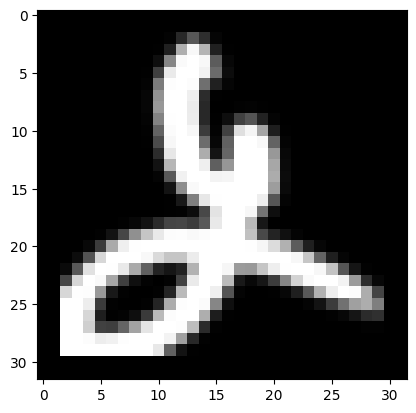

In [81]:
img = get_image_at(101)
plt.imshow(img, cmap='gray')

In [82]:
train_x.shape


(17000, 1024)

In [83]:
train_y.shape

(17000, 1)

# K Nearest Neighbour

In [84]:
K = 30
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=30)

In [ ]:
#save the model
import joblib
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [156]:
y_pred = knn.predict(test_x)

In [86]:
y_pred.shape,

(3000,)

In [88]:
test_y.flatten().shape

(3000,)

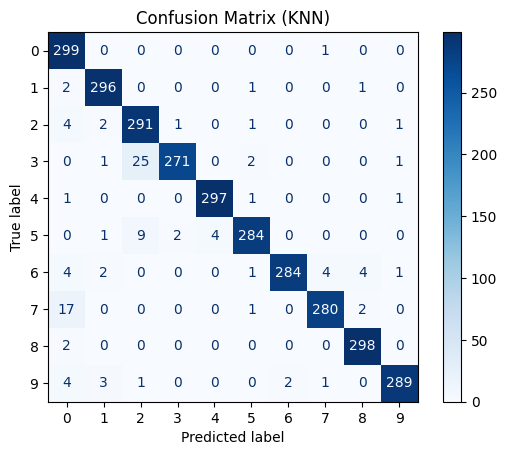

Precision: 0.96
F1 Score: 0.96
Accuracy: 0.96
Recall: 0.96


In [157]:
get_metrics(knn, test_y.flatten(), y_pred, name='KNN')

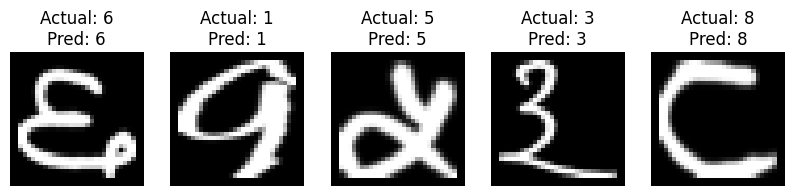

In [97]:
random_images_predict(model=knn)

#K Means Clustering

In [128]:
k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(train_x)

KMeans(n_clusters=10)

In [129]:
kmeans.cluster_centers_.shape

(10, 1024)

In [130]:
kmeans.labels_.shape

(17000,)

In [131]:
clusters = np.zeros_like(kmeans.labels_)
mapping = dict()
for i in range(k):
    mask = (kmeans.labels_ == i)
    clusters[mask] = mode(train_y[mask])[0]
    mapping[i] = mode(train_y[mask].astype(int))[0][0]

In [132]:
kmeans.labels_[:100] #automatic labels

array([3, 6, 8, 9, 5, 8, 7, 8, 3, 5, 1, 5, 4, 2, 4, 0, 9, 5, 0, 2, 0, 9,
       9, 9, 6, 5, 5, 4, 3, 6, 8, 9, 2, 4, 2, 4, 8, 8, 3, 5, 5, 9, 8, 4,
       8, 3, 8, 5, 5, 8, 4, 9, 1, 3, 2, 1, 9, 0, 7, 5, 1, 4, 1, 2, 0, 2,
       0, 0, 1, 1, 7, 7, 7, 3, 9, 4, 1, 1, 2, 3, 7, 7, 4, 4, 5, 0, 1, 4,
       6, 8, 8, 0, 3, 0, 9, 0, 0, 5, 3, 4], dtype=int32)

In [133]:
clusters[:100] #actual labels from the train set

array([0, 9, 1, 2, 5, 1, 3, 1, 0, 5, 8, 5, 7, 4, 7, 6, 2, 5, 6, 4, 6, 2,
       2, 2, 9, 5, 5, 7, 0, 9, 1, 2, 4, 7, 4, 7, 1, 1, 0, 5, 5, 2, 1, 7,
       1, 0, 1, 5, 5, 1, 7, 2, 8, 0, 4, 8, 2, 6, 3, 5, 8, 7, 8, 4, 6, 4,
       6, 6, 8, 8, 3, 3, 3, 0, 2, 7, 8, 8, 4, 0, 3, 3, 7, 7, 5, 6, 8, 7,
       9, 1, 1, 6, 0, 6, 2, 6, 6, 5, 0, 7], dtype=int32)

In [134]:
mapping

{0: 6, 1: 8, 2: 4, 3: 0, 4: 7, 5: 5, 6: 9, 7: 3, 8: 1, 9: 2}

In [ ]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [158]:
y_pred = kmeans.predict(test_x)
y_pred = np.array([mapping[i] for i in y_pred])
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy of k-means: {accuracy:.2f}")

Accuracy of k-means: 0.65


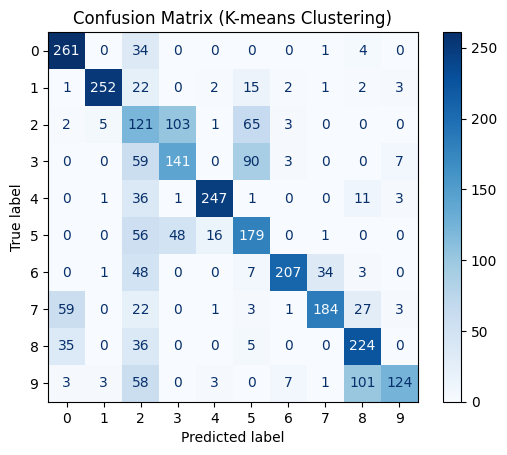

Precision: 0.71
F1 Score: 0.66
Accuracy: 0.65
Recall: 0.65


In [159]:
get_metrics(kmeans, test_y.flatten(), y_pred, name='K-means Clustering', _display_labels=np.arange(10))

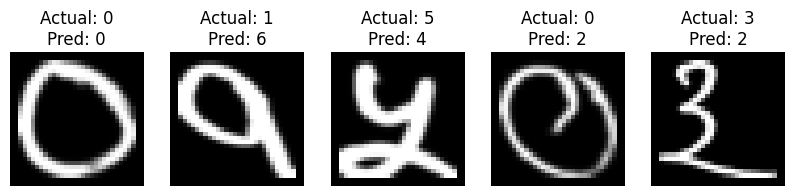

In [125]:
random_images_predict_kmeans()

# Artificial Neural Network

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(train_y, 10)
y_test = to_categorical(test_y, 10)
# 3. Build the Neural Network model
ann = Sequential([ # Flatten the 28x28 images into a 1D vector
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit) and softmax activation
])

# 4. Compile the ann
ann.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the ann
ann.fit(train_x, y_train, epochs=5, batch_size=32, validation_split=0.2)




Epoch 1/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8389 - loss: 0.5525 - val_accuracy: 0.9568 - val_loss: 0.1667
Epoch 2/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9678 - loss: 0.1107 - val_accuracy: 0.9668 - val_loss: 0.1239
Epoch 3/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0577 - val_accuracy: 0.9729 - val_loss: 0.0998
Epoch 4/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0387 - val_accuracy: 0.9718 - val_loss: 0.0977
Epoch 5/5
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0226 - val_accuracy: 0.9738 - val_loss: 0.0945


In [108]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 128)                   │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,472 (1.52 MB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264,982 (1.01 MB)

In [ ]:
ann.save('ann_model.keras')

In [ ]:
from tensorflow.keras.models import load_model
ann = load_model('ann_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [160]:
# test_loss, test_acc = ann.evaluate(test_x, y_test)
y_pred = ann.predict(test_x)
y_pred = y_pred.argmax(axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


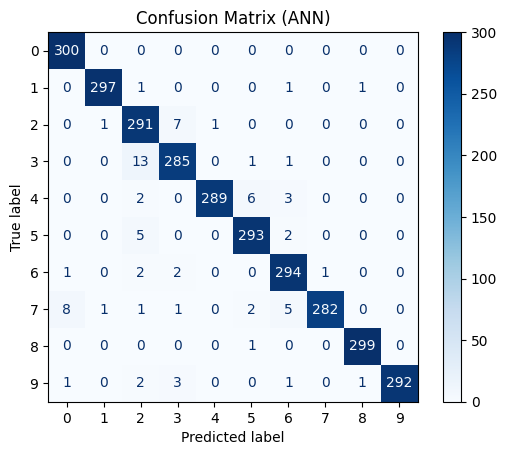

Precision: 0.97
F1 Score: 0.97
Accuracy: 0.97
Recall: 0.97


In [161]:
get_metrics(ann, test_y.flatten(), y_pred, name='ANN', _display_labels=np.arange(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


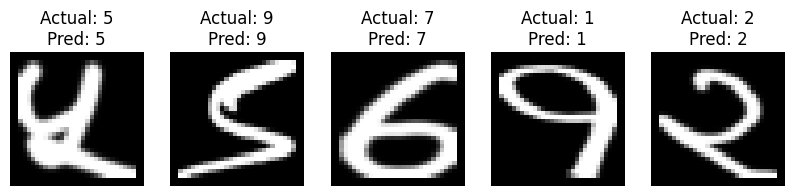

In [114]:
random_images_predict_ann()

#Support Vector Machine

In [139]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='linear')
svm.fit(train_x, train_y)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
y_pred = svm.predict(test_x)

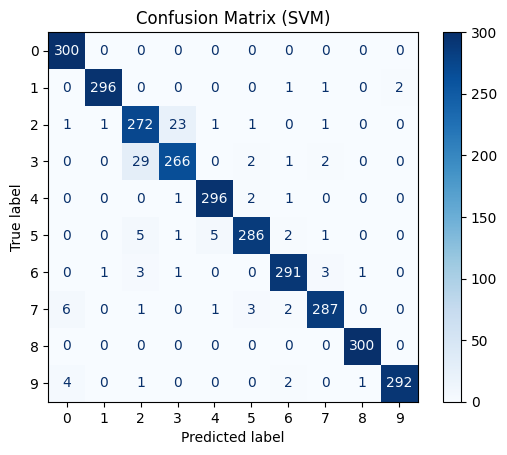

Precision: 0.96
F1 Score: 0.96
Accuracy: 0.96
Recall: 0.96


In [163]:
get_metrics(svm, test_y.flatten(), y_pred, name='SVM')

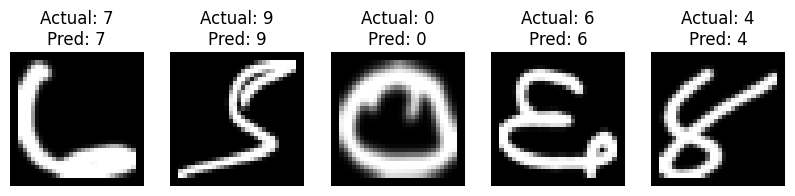

In [119]:
random_images_predict(model=svm)

In [ ]:
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

# Frontend Image Preprocessing

In [ ]:
def horizontal_cutout(img):
  means = np.mean(img, axis=1)
  is_top = True
  top = 0
  bottom = 0
  end = len(means)-1
  for index, item in enumerate(means):
    if item != 255 and is_top:
      top = index
      is_top = False
    elif item == 255 and not is_top and index>top+40:
      bottom = index
      break
    elif item == 255 and index == end :
      bottom = end
  print(top, bottom)
  return img[top:bottom]

def vertical_cutout(img):
  img_t = np.transpose(img)
  img = horizontal_cutout(img_t)
  img = np.transpose(img)
  return img

def image_cutout(img):
  img = horizontal_cutout(img)
  img = vertical_cutout(img)
  return img

def preprocess_image(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #grayscale
  image = image_cutout(image) #cutout the number
  blurred = cv2.GaussianBlur(image, (23, 23), 0) #blur
  image = cv2.resize(blurred, (100, 100)) #resize to 100 for padding
  padding = 10 #padding
  padded_image = np.pad(
    image,
    pad_width=padding,
    mode='constant',
    constant_values=255  # White padding
  )
  resized = cv2.resize(padded_image, (32, 32)) #resize to 32x32
  inverted = 255.0 - resized #invert
  return inverted

10 384
128 392


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

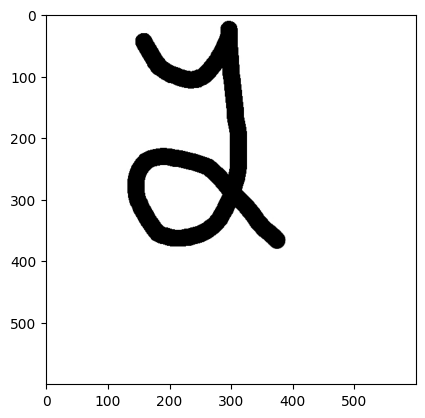

In [ ]:
image = cv2.imread('image.jpeg')
plt.imshow(image, cmap='gray')
result = preprocess_image(image)
result


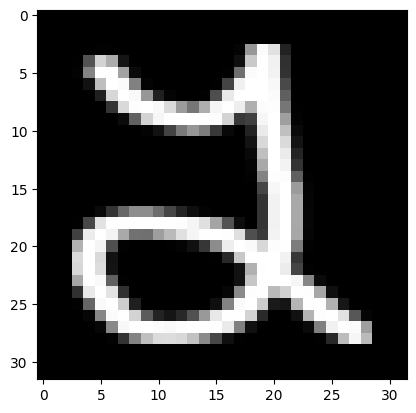

In [ ]:
plt.imshow(result, cmap='gray')
x  = result/255.0
x = x.reshape(1,-1)